In [45]:
# Import of the necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Accuracy
from sklearn.metrics import mean_squared_error

## Building Model
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
# import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Data Visualization
import seaborn as sn
import matplotlib.pyplot as plt

## Multidimensional Scaling
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# randompoisson
## description
contains 1000 by 10000 Poisson distributed random numbers with means per column taken from an exponential distribution. This can be considered simplified fictive/dummy count data, e.g., from genomics/transcriptomics, with 1000 observations in 10000 variables.
    
**Research question**: Is PCA a nice model when we have to handle the random number?

**Method**: PCA

**Rationale for using the method**: 
For unsupervised learning, normally we will try PCA to get the result. Moreover, in high dimensions, we have to reduce the dimension.

**Expectations**: 
I expect PCA can help us find some clusters from the dataset.

In [34]:
df = pd.read_table('randompoisson.dat.gz',compression="gzip",sep=" ",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,572,752,666,140,2211,398,23,2071,1653,708,...,2865,410,293,86,999,199,80,359,483,367
1,588,750,620,166,2265,402,23,2152,1580,744,...,2792,467,316,97,994,179,96,370,472,388
2,580,694,666,166,2148,348,31,2141,1509,699,...,2763,459,272,121,914,199,88,400,476,420
3,600,773,681,132,2264,351,22,2146,1685,713,...,2813,415,321,98,985,184,105,376,488,387
4,576,751,645,121,2292,368,23,2050,1577,689,...,2734,426,325,100,1015,166,102,398,437,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,598,750,652,130,2243,373,22,2137,1651,743,...,2885,419,298,79,979,183,104,403,475,400
996,599,786,642,163,2251,398,23,2166,1631,663,...,2828,422,323,94,992,176,107,378,495,405
997,585,752,663,155,2178,372,27,2118,1610,732,...,2769,435,322,87,916,169,104,398,444,382
998,565,798,667,129,2253,374,18,2131,1568,736,...,2910,446,308,118,926,187,101,404,493,389


In [35]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,572,752,666,140,2211,398,23,2071,1653,708,...,2865,410,293,86,999,199,80,359,483,367
1,588,750,620,166,2265,402,23,2152,1580,744,...,2792,467,316,97,994,179,96,370,472,388
2,580,694,666,166,2148,348,31,2141,1509,699,...,2763,459,272,121,914,199,88,400,476,420
3,600,773,681,132,2264,351,22,2146,1685,713,...,2813,415,321,98,985,184,105,376,488,387
4,576,751,645,121,2292,368,23,2050,1577,689,...,2734,426,325,100,1015,166,102,398,437,414


In [36]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
995,598,750,652,130,2243,373,22,2137,1651,743,...,2885,419,298,79,979,183,104,403,475,400
996,599,786,642,163,2251,398,23,2166,1631,663,...,2828,422,323,94,992,176,107,378,495,405
997,585,752,663,155,2178,372,27,2118,1610,732,...,2769,435,322,87,916,169,104,398,444,382
998,565,798,667,129,2253,374,18,2131,1568,736,...,2910,446,308,118,926,187,101,404,493,389
999,555,716,637,152,2292,357,20,2139,1521,706,...,2832,438,352,102,1007,192,84,402,461,371


In [37]:
df.isna().sum().sum()

0

Loading the dataset and also check the missing values.

In [38]:
X = StandardScaler().fit_transform(df)

To centralize and normalize befor performing PCA, Standardscaler is a nice choice before further steps.

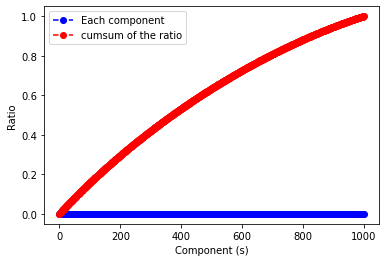

In [39]:
n = 1000
pca = PCA(n_components=n)
pca.fit(X)
plt.plot(pca.explained_variance_ratio_,"ob--",label="Each component")
plt.plot(np.cumsum(pca.explained_variance_ratio_),"or--",label="cumsum of the ratio")
plt.ylabel("Ratio")
plt.xlabel("Component (s)")
plt.legend()
plt.show()

We can get an 80% ratio at around 700 components. Let's try different packages for the further steps.

**Try another package before working further**

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [10000] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[700]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


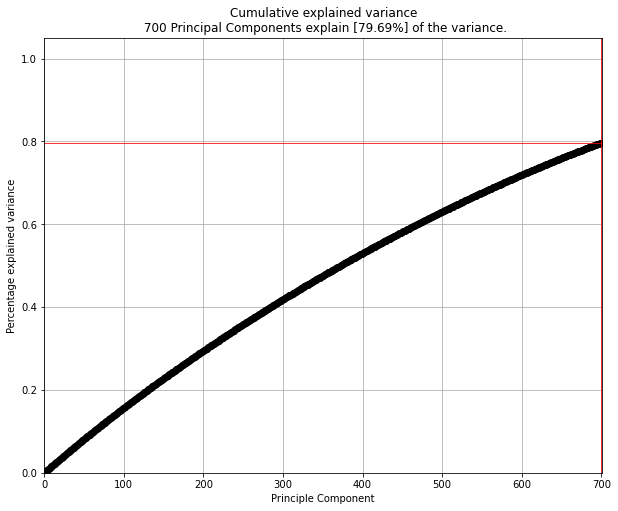

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 700 Principal Components explain [79.69%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [40]:
from pca import pca
model = pca(n_components=700,normalize=False)
results = model.fit_transform(X)
model.plot(figsize=(10,8))

[pca] >Plot PC1 vs PC2 with loadings.


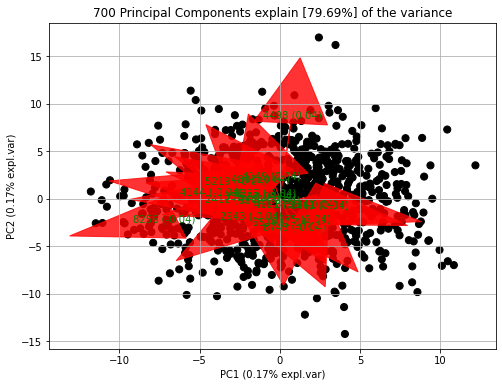

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:title={'center':'700 Principal Components explain [79.69%] of the variance'}, xlabel='PC1 (0.17% expl.var)', ylabel='PC2 (0.17% expl.var)'>)

In [41]:
model.biplot(n_feat=18, legend=False, figsize=(8,6), label=True)

In [42]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,598.690000,758.301000,661.557000,144.737000,2235.213000,368.953000,24.327000,2115.199000,1603.550000,712.842000,...,2835.339000,423.142000,319.591000,97.148000,981.502000,180.15500,102.616000,385.592000,482.154000,391.565000
std,24.267402,27.628024,24.357505,12.434728,50.076694,18.614599,4.807617,46.222223,39.424812,26.297311,...,54.234947,21.013172,18.499512,9.863234,30.983253,13.30007,9.598994,19.798725,22.079397,19.544149
min,526.000000,667.000000,592.000000,106.000000,2062.000000,306.000000,11.000000,1957.000000,1472.000000,625.000000,...,2662.000000,342.000000,259.000000,70.000000,867.000000,139.00000,77.000000,321.000000,401.000000,331.000000
25%,582.750000,739.000000,644.000000,136.000000,2202.000000,357.000000,21.000000,2085.000000,1576.750000,694.000000,...,2797.000000,408.750000,307.000000,91.000000,960.000000,172.00000,96.000000,372.000000,468.000000,378.000000
50%,599.000000,758.000000,661.500000,145.000000,2235.000000,370.000000,24.000000,2118.000000,1604.000000,712.000000,...,2835.000000,423.000000,321.000000,97.000000,982.000000,180.00000,103.000000,385.000000,482.000000,391.000000
75%,616.000000,776.000000,678.000000,153.000000,2269.000000,380.000000,28.000000,2144.000000,1629.000000,731.000000,...,2870.000000,436.000000,331.000000,104.000000,1001.000000,189.00000,109.000000,400.000000,497.000000,405.000000
max,667.000000,836.000000,734.000000,179.000000,2394.000000,435.000000,41.000000,2240.000000,1736.000000,798.000000,...,3004.000000,494.000000,388.000000,129.000000,1086.000000,219.00000,135.000000,445.000000,556.000000,452.000000


**Interpretation and reflection**

As we can see, PCA cannot separate it nicely. PCA is not the best one for this dataset. Each component can only explain a little. We can see the std is similar. That's the reason PCA cannot do it well.

### Conclusion
I perform PCA and find it is not a good method for this dataset. PCA might be useful for the random dataset. 

However, before using it, we must check the variance. If the variance is not big enough, it cannot separate the sample nicely.

## 1) Lysozyme_rmsds.csv : Finding the relationship between different lysozyme

#### Description
Lysozyme is one of the most studied proteins. The given dataset contains a distance matrix of a selection of lysozyme structures from the Protein DataBank (PDB). Distances were determined as root-mean-square deviation (RMSD) after least-squares alignment using the CE align algorithm.


####  Multidimensional scaling (MDS)
A visual representation of distances or dissimilarities between sets of objects. Objects that are more similar (or have shorter distances) are closer together on the graph than objects that are less similar (or have longer distances). As well as interpreting dissimilarities as distances on a graph, MDS can also serve as a dimension reduction technique for high-dimensional data. (https://www.statisticshowto.com/multidimensional-scaling/)


#### Rationale for using the MDS method
Multidimensional scaling is a technic of transforming data into a lower dimension. Moreover, it keeps the same distances between points and reasonably preserves patterns and clusters. As we can see the given dataset contains a distance matrix of a selection of lysozyme structures. And the distances were determined as root-mean-square deviation (RMSD) after least-squares alignment. That is why the best way to analyzing of this dataset is Multisimentional Scaling (MDS). 

#### Working approach
Sometimes a dataset is so huge that we can not analyze it with PCA because of the huge correlation matrix so we need another method like MDS to be able to use a distance matrix but in this case, because the data set is a distance matrix, not that much huge, so we can also use the PCA.

The important thing is that I expected the result of PCA and MDS would be the same because minimizing the linear distance is the same as maximizing the linear correlation. There is no need to be standardized because these numbers are the differences between the two points.

#### Expectations
I expect we can see a clear separation between each group of lysozyme.

In [23]:
#Read the data
# df = pd.read_csv("lysozyme_rmsds.csv",header=0,index_col=0)
df = pd.read_csv("lysozyme_rmsds.csv")

df.shape

(172, 173)

In [24]:
df.head()
# df.tail()

,Unnamed: 0,1ta0,5m1y,1flq,4ru1,1uia,3ma8,2zc6,4m53,1cwv,...,5dla,4u2a,6fe3,4ws6,225l,1l17,4zee,5hmj,4qdn,4x6p
0,1ta0,0.000000,9.944671,10.914137,5.368414,10.147917,6.330169,13.397298,4.796260,6.708178,...,10.748649,4.697932,6.442754,5.967243,6.613105,6.550033,10.885024,10.758552,10.531178,7.134530
1,5m1y,9.944671,0.000000,0.351689,8.778090,0.360542,6.532751,6.447437,11.661980,10.892651,...,0.450633,6.518186,10.142028,8.008221,5.411168,5.225135,0.423226,0.382607,4.660109,6.716681
2,1flq,10.914137,0.351689,0.000000,8.781974,0.201154,5.892352,6.476417,10.141856,8.676370,...,0.300225,6.862653,8.398187,8.305965,5.385658,5.390587,0.312325,0.241490,4.646545,6.584307
3,4ru1,5.368414,8.778090,8.781974,0.000000,8.802099,6.510888,11.596014,6.613473,6.483236,...,10.002309,9.219876,8.978669,5.131378,8.586637,9.308215,7.545538,9.995192,11.135262,10.210994
4,1uia,10.147917,0.360542,0.201154,8.802099,0.000000,8.169978,6.458828,11.358191,10.635841,...,0.296834,7.002353,11.221244,10.178038,5.404494,5.409590,0.333920,0.247616,4.522474,6.734468


The first column (Unnamed: 0) does not carry any significant information. So lets drop this column.

In [25]:
df=df.drop("Unnamed: 0", axis=1)
df.head()

,1ta0,5m1y,1flq,4ru1,1uia,3ma8,2zc6,4m53,1cwv,6nup,...,5dla,4u2a,6fe3,4ws6,225l,1l17,4zee,5hmj,4qdn,4x6p
0,0.000000,9.944671,10.914137,5.368414,10.147917,6.330169,13.397298,4.796260,6.708178,5.249331,...,10.748649,4.697932,6.442754,5.967243,6.613105,6.550033,10.885024,10.758552,10.531178,7.134530
1,9.944671,0.000000,0.351689,8.778090,0.360542,6.532751,6.447437,11.661980,10.892651,8.494948,...,0.450633,6.518186,10.142028,8.008221,5.411168,5.225135,0.423226,0.382607,4.660109,6.716681
2,10.914137,0.351689,0.000000,8.781974,0.201154,5.892352,6.476417,10.141856,8.676370,8.771998,...,0.300225,6.862653,8.398187,8.305965,5.385658,5.390587,0.312325,0.241490,4.646545,6.584307
3,5.368414,8.778090,8.781974,0.000000,8.802099,6.510888,11.596014,6.613473,6.483236,7.988591,...,10.002309,9.219876,8.978669,5.131378,8.586637,9.308215,7.545538,9.995192,11.135262,10.210994
4,10.147917,0.360542,0.201154,8.802099,0.000000,8.169978,6.458828,11.358191,10.635841,8.761022,...,0.296834,7.002353,11.221244,10.178038,5.404494,5.409590,0.333920,0.247616,4.522474,6.734468


Now lets check the missing or NULL data

In [26]:
print("Total missing data:", df.isna().sum().sum())

Total missing data: 0


There is no missing value in the dataset. 
For the next step, we don’t want to give more weight to some features only because their order of magnitude is higher than others’. A simple 0–1 normalization will solve this problem effectively.

In [27]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df)

There are several distance methods. **Manhattan distance** is usually preferred over the more common **Euclidean distance** when there is high dimensionality in the data. 

In [28]:
dist_manhattan = manhattan_distances(x_scaled)
dist_euclid = euclidean_distances(x_scaled)

Before putting components we must check how many components should we put. Let's check it in a different distance method!

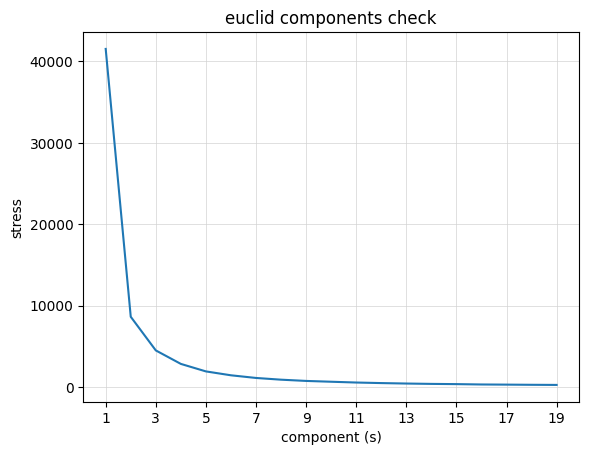

In [30]:
stress = []
max_range = 20
for dim in range(1, max_range):
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
    mds.fit_transform(dist_euclid)
    stress.append(mds.stress_) 
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('Number of components')
plt.ylabel('Stress level')
plt.title("Euclid components check")
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.show()


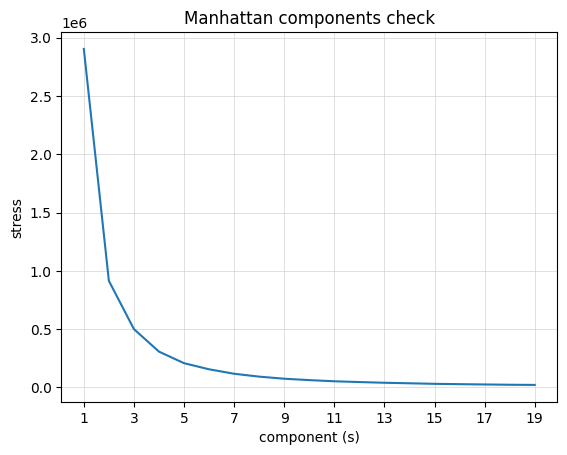

In [31]:
stress = []
max_range = 20
for dim in range(1, max_range):
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
    mds.fit_transform(dist_manhattan)
    stress.append(mds.stress_)
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('Number of components')
plt.ylabel('Stress level')
plt.title("Manhattan components check")
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.show()

From the above graphs, we can see that both components can perform well. I will try both components for the further steps.

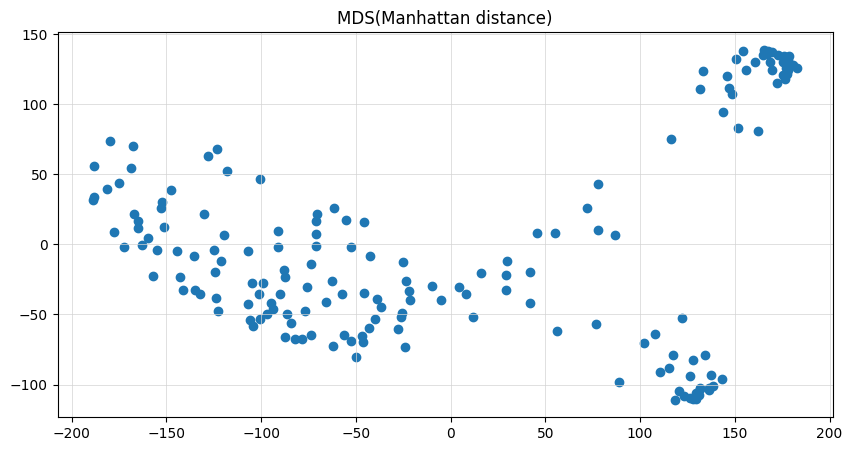

In [36]:
mds_sklearn = MDS(n_components=2)
x_sklearn = mds_sklearn.fit_transform(dist_manhattan)
plt.figure(figsize=(10, 5))
plt.scatter(x_sklearn[:,0],x_sklearn[:,1])
plt.title('MDS(Manhattan distance)')
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.show()

As we can see from the result, middle-upper, middle right, and middle, there are some lysozyme structures close to each other. That means they have a similar structure. Maybe scientists can take the closely related lysozyme to do some research. In the future, they can do some research about the evolution of the lysozyme. The closer the lysozyme is, the function closer it will be.

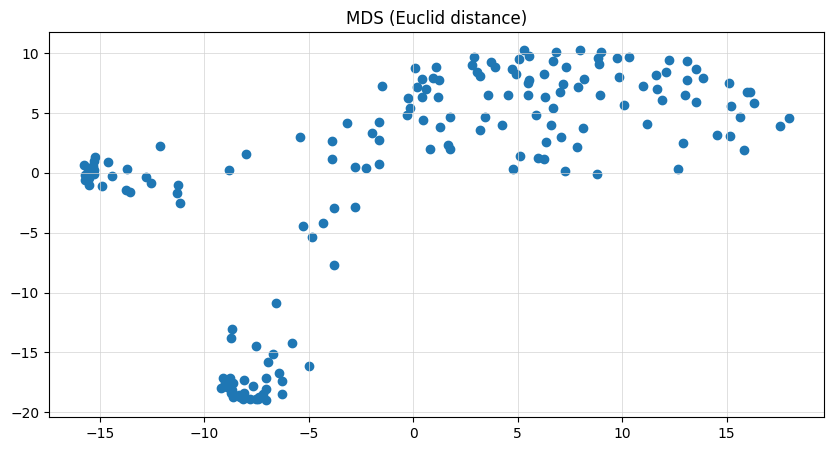

In [37]:
mds_sklearn = MDS(n_components=2)
x_sklearn = mds_sklearn.fit_transform(dist_euclid)
plt.figure(figsize=(10, 5))
plt.scatter(x_sklearn[:,0],x_sklearn[:,1])
plt.title('MDS (Euclid distance)')
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.show()

As we can see from the result, middle-bottom, bottom-right, and upper-left, there are some lysozyme structures close to each other. That means they have a similar structure. I think this one performs better. It groups them into three clusters. I think maybe we can try the unsupervised method - PCA for checking the performance.

**Try another Method**

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [172] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[30]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


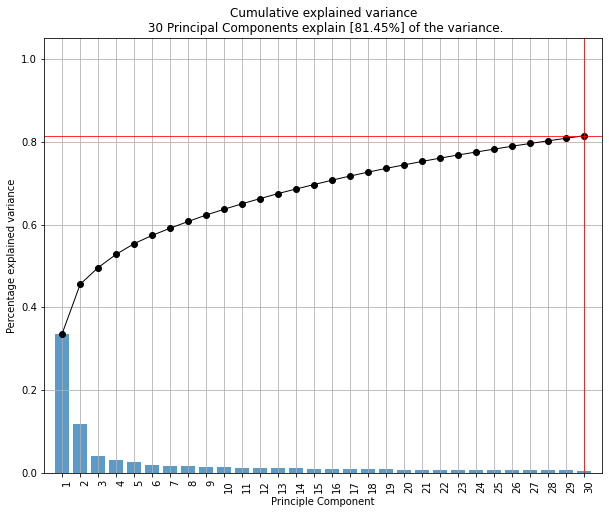

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 30 Principal Components explain [81.45%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [ ]:
df = pd.read_csv("lysozyme_rmsds.csv",header=0,index_col=0)
model = pca(n_components=30,normalize=True)
results = model.fit_transform(df)
model.plot(figsize=(10,8))

[pca] >Plot PC1 vs PC2 with loadings.


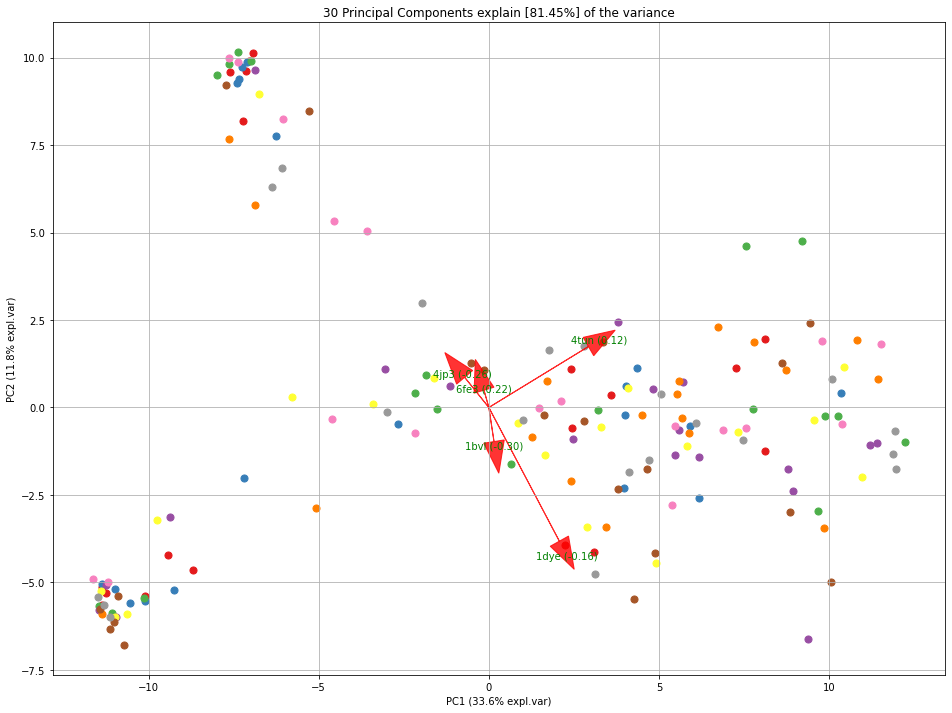

(<Figure size 1152x864 with 1 Axes>,
 <AxesSubplot:title={'center':'30 Principal Components explain [81.45%] of the variance'}, xlabel='PC1 (33.6% expl.var)', ylabel='PC2 (11.8% expl.var)'>)

In [ ]:
model.biplot(n_feat=5, legend=False, figsize=(16,12), label=False)

**Interpretation and reflection**

The first PC explains 33.6% and the second PC 11.8%. There is no clear cluster of the lysozyme by using PCA. To perform by MDS get a better cluster result.

### Conclusion

From the output of PCA and MDS, we can find MDS performs better no matter in manhattan or in euclid. 

In the future, if scientists want to do some research about lysozome, they must choose the close one. 

The ungroup lysosome should add more samples to find the relationship between each other.

In [50]:
X = df.iloc[:, 1:]
# print(X)
y = df.iloc[:, 0]
# print(y)

# regr = linear_model.LinearRegression()
# regr.fit(X, y) 
# pred = regr.predict(X)

In [51]:
X_sample = X.copy()

stress = []
for i in range(1, 10):
    model = MDS(n_components=i)
    
    pts = model.fit_transform(X_sample)
    
    stress.append(model.stress_)

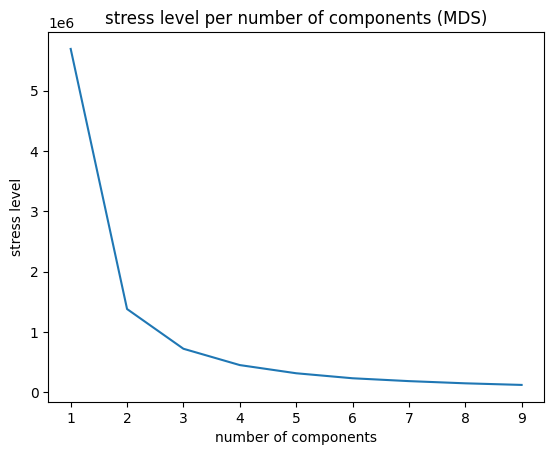

In [52]:
plt.plot(range(1, 10), stress)
plt.xticks(range(1, 10))
plt.title('stress level per number of components (MDS)')
plt.ylabel('stress level')
plt.xlabel('number of components')
plt.show()

In [53]:
mds = MDS(n_components=2, random_state=777, dissimilarity='euclidean')

In [57]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X[:])

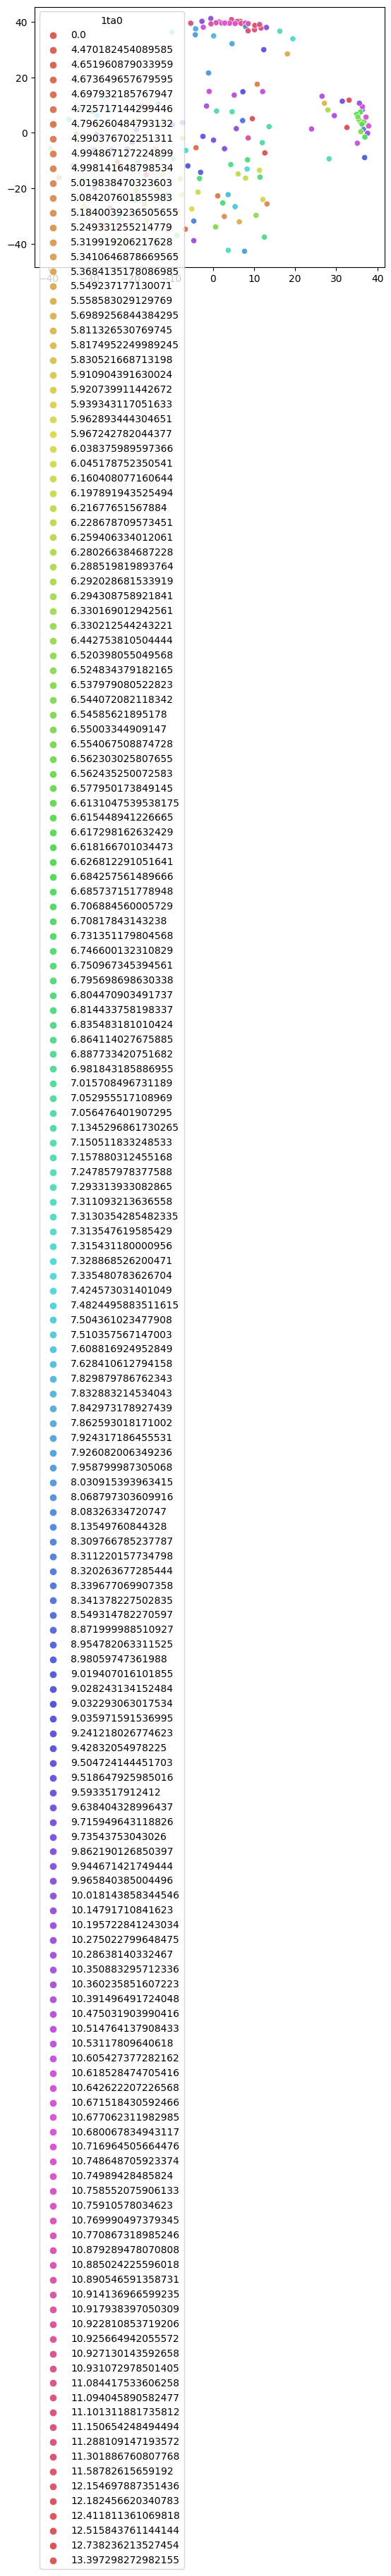

In [59]:
# fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 2, 1)
ax = sn.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y, palette=sn.color_palette("hls", len(set(y))))

plt.show()